## Ted's Analysis

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_validate, ShuffleSplit
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

###  I've been having issues with the test data not matching up with the train data, and after mucho mucho trial and error, I've been able to determine that there is one single entry in the entire 22000 listed that has a "grade" of "3 Poor".  When samples are split into train and test sets, one gets the single, the other does not.  This results is mismatched columns/rows at the end of the process, which was super frustrating, but easy to fix here:

In [7]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [8]:
df = df[df['grade'] != "3 Poor"]

In [9]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
Name: grade, dtype: int64

####  Now that that one is gone, we can proceed without too much problem hopefully:

##  If we are looking at just the high-end properties, I will chop off everything below 1 std above the mean:

# NEVERMIND WE WERE SHOT DOWN FOR THIS IDEA SO I WILL COMMENT IT ALL OUT

In [10]:
# sns.distplot(df['price']);

In [11]:
# price_mean = df['price'].mean()
# price_median = df['price'].median()
# price_std = df['price'].std()
# print("Price mean:  " + str(round(price_mean, 0)) + "   Price stdev:  " + str(round(price_std, 0)))
# print("Price median:  " + str(round(price_median,0)))

In [12]:
# sns.histplot(df['price'])
# plt.legend
# plt.axvline(price_mean, 0, 0.5, color = "darkblue");

In [13]:
# df = df[df['price'] > (price_mean + price_std)]

### I also need to drop a few categories from "Condition" or a few things downstream are not going to work right either:

In [14]:
# df = df[df['condition'] != "Fair"]

In [15]:
# df = df[df['condition'] != "Poor"]

In [16]:
# df['condition'].value_counts()

# The prediction target is price
## Let's make a population density plot and see how it all looks.

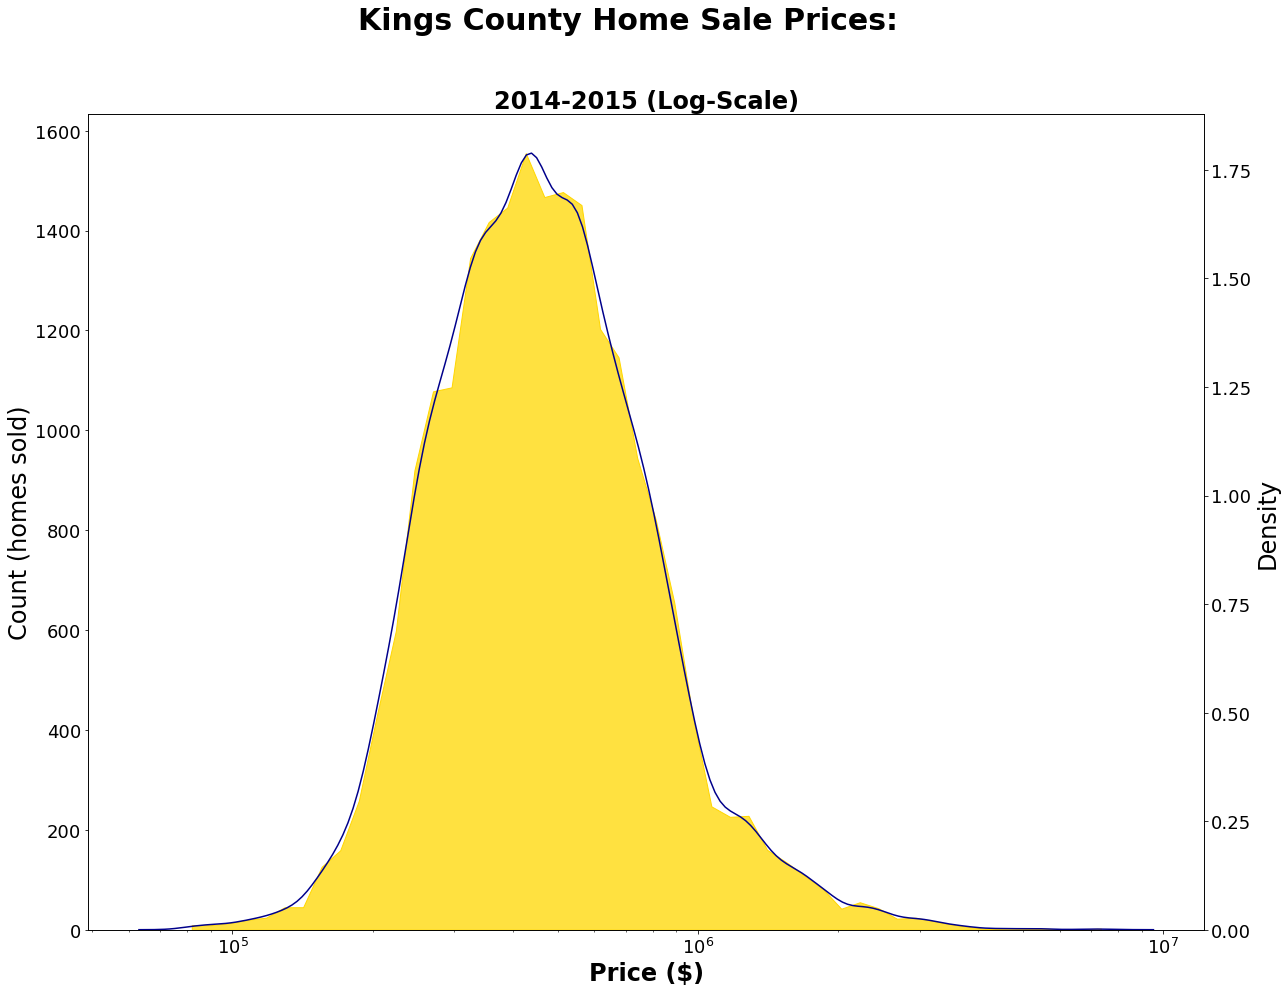

In [133]:
x=df['price']
fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle('Kings County Home Sale Prices:', fontsize=30, fontweight='bold')
sns.histplot(x, ax=ax, bins=50, color="gold", log_scale=True, element='poly')
plt.xlabel('Price ($)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=18)
ax.set_xscale('linear')
plt.ylabel('Count (homes sold)', fontsize=24)
plt.yticks(fontsize=18)
ax2 = ax.twinx()
sns.kdeplot(x, ax=ax2, color="darkblue", log_scale=True)
plt.title('2014-2015 (Log-Scale)', fontsize=24, fontweight='bold')
plt.yticks(fontsize=18)
plt.ylabel('Density', fontsize=24)
plt.savefig('Home_Sale_Prices');

### Great, now let's start the cleanup

In [18]:
y = df['price']
X = df.drop('price',axis=1)

In [19]:
##  sklearn model_selection train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [20]:
print(f"X_train is a DataFram with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFram with 16197 rows and 20 columns
y_train is a Series with 16197 values


In [21]:
print(f"X_test is a DataFram with {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"y_test is a Series with {y_test.shape[0]} values")

X_test is a DataFram with 5399 rows and 20 columns
y_test is a Series with 5399 values


In [22]:
##  sklearn linear_model LinearRegression:  Should fail at this point and it does, so it is
##    commented out.  This includes ALL, non-converted data, so it needs lots of cleaning

model = LinearRegression()
# model.fit(X_train, y_train)

In [23]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13856,824059042,5/30/2014,5,3.50,4180,17935,2.0,NO,NONE,Average,11 Excellent,4180,0.0,2004,NaN,98004,47.5873,-122.202,2950,13760
17086,9297300500,10/23/2014,2,1.00,870,4000,1.0,NO,AVERAGE,Average,7 Average,870,0.0,1950,0.0,98126,47.5682,-122.374,1690,4000
13334,1310900610,7/14/2014,4,2.25,2210,11700,2.0,NO,NONE,Good,8 Good,2210,0.0,1967,0.0,98032,47.3648,-122.284,2040,9000
12563,6134500220,7/28/2014,3,2.50,2480,6600,2.0,NO,NONE,Average,8 Good,2480,0.0,2002,0.0,98053,47.6313,-122.008,2310,6656
11349,3303860030,10/29/2014,4,2.50,4060,8547,2.0,NO,NONE,Average,9 Better,2790,1270.0,2007,0.0,98038,47.3694,-122.056,2810,8313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,4/7/2015,3,3.00,3250,5093,2.0,NO,GOOD,Average,10 Very Good,3250,0.0,2004,0.0,98146,47.5123,-122.390,2820,7752
11826,6743700060,7/14/2014,4,1.75,3140,12519,1.0,NaN,NONE,Average,7 Average,2320,820.0,1951,NaN,98033,47.6941,-122.173,2240,7308
14741,6143600555,6/9/2014,4,1.75,1300,21000,1.0,NO,NONE,Good,7 Average,1300,0.0,1969,NaN,98001,47.3067,-122.285,2120,9920
9819,425079046,7/29/2014,3,2.50,1778,147823,2.0,NO,NONE,Average,7 Average,1778,0.0,1999,0.0,98014,47.6811,-121.915,2840,43676


###  Converting the sell date ("date") to a sortable integer

In [24]:
# ##  Change date format, but keep, in case we want to use it later

date_num = []
for date in X_train['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_train['date_num'] = date_num

<ipython-input-24-74e9c2404cf9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['date_num'] = date_num


#### Dropping the sell date so a regression can still be performed

In [25]:
###  Date and other columns to drop(lat and long) - not useful for this analysis
lat_long = ['lat','long','date']
X_train = X_train.drop(lat_long, axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_num
13856,824059042,5,3.50,4180,17935,2.0,NO,NONE,Average,11 Excellent,4180,0.0,2004,NaN,98004,2950,13760,201405
17086,9297300500,2,1.00,870,4000,1.0,NO,AVERAGE,Average,7 Average,870,0.0,1950,0.0,98126,1690,4000,201401
13334,1310900610,4,2.25,2210,11700,2.0,NO,NONE,Good,8 Good,2210,0.0,1967,0.0,98032,2040,9000,201407
12563,6134500220,3,2.50,2480,6600,2.0,NO,NONE,Average,8 Good,2480,0.0,2002,0.0,98053,2310,6656,201407
11349,3303860030,4,2.50,4060,8547,2.0,NO,NONE,Average,9 Better,2790,1270.0,2007,0.0,98038,2810,8313,201401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,NO,GOOD,Average,10 Very Good,3250,0.0,2004,0.0,98146,2820,7752,201504
11826,6743700060,4,1.75,3140,12519,1.0,NaN,NONE,Average,7 Average,2320,820.0,1951,NaN,98033,2240,7308,201407
14741,6143600555,4,1.75,1300,21000,1.0,NO,NONE,Good,7 Average,1300,0.0,1969,NaN,98001,2120,9920,201406
9819,425079046,3,2.50,1778,147823,2.0,NO,NONE,Average,7 Average,1778,0.0,1999,0.0,98014,2840,43676,201407


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 13856 to 4042
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     14386 non-null  object 
 7   view           16152 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  object 
 12  yr_built       16197 non-null  int64  
 13  yr_renovated   13271 non-null  float64
 14  zipcode        16197 non-null  int64  
 15  sqft_living15  16197 non-null  int64  
 16  sqft_lot15     16197 non-null  int64  
 17  date_num       16197 non-null  int64  
dtypes: 

In [27]:
X_train['waterfront'].value_counts()

NO     14272
YES      114
Name: waterfront, dtype: int64

In [28]:
X_train.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1811
view               45
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2926
zipcode             0
sqft_living15       0
sqft_lot15          0
date_num            0
dtype: int64

Since there are 1822 listing with "waterfront" missing, but less than 1% of listed homes have a waterfront access, these seem like infrequent enough cases that we will fill in the waterfront NaNs with "NO" instead

In [29]:
X_train['waterfront'] = X_train['waterfront'].fillna("NO")

In [30]:
X_train.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               45
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2926
zipcode             0
sqft_living15       0
sqft_lot15          0
date_num            0
dtype: int64

Doing the same thing with the "view column now:

In [31]:
X_train['view'].value_counts()

NONE         14552
AVERAGE        741
GOOD           379
FAIR           241
EXCELLENT      239
Name: view, dtype: int64

We will go with the mode of this to replace the 49 missing values, as this is the likely case.

In [32]:
X_train['view'] = X_train['view'].fillna("NONE")

In [33]:
X_train.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2926
zipcode             0
sqft_living15       0
sqft_lot15          0
date_num            0
dtype: int64

In [34]:
X_train['yr_renovated'].value_counts()

0.0       12709
2014.0       53
2003.0       23
2007.0       22
2013.0       22
          ...  
1958.0        1
1946.0        1
1948.0        1
1934.0        1
1960.0        1
Name: yr_renovated, Length: 68, dtype: int64

#### Very few homes from this list have been renovated.  The 0 values may have never been renovated, but we can't know that for sure.  Since there are so many 0s and so many missing entries, the column itself needs to be dropped.  If we want to add it back later, we'll have to address these issues.

In [35]:
X_train = X_train.drop('yr_renovated', axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num
13856,824059042,5,3.50,4180,17935,2.0,NO,NONE,Average,11 Excellent,4180,0.0,2004,98004,2950,13760,201405
17086,9297300500,2,1.00,870,4000,1.0,NO,AVERAGE,Average,7 Average,870,0.0,1950,98126,1690,4000,201401
13334,1310900610,4,2.25,2210,11700,2.0,NO,NONE,Good,8 Good,2210,0.0,1967,98032,2040,9000,201407
12563,6134500220,3,2.50,2480,6600,2.0,NO,NONE,Average,8 Good,2480,0.0,2002,98053,2310,6656,201407
11349,3303860030,4,2.50,4060,8547,2.0,NO,NONE,Average,9 Better,2790,1270.0,2007,98038,2810,8313,201401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,NO,GOOD,Average,10 Very Good,3250,0.0,2004,98146,2820,7752,201504
11826,6743700060,4,1.75,3140,12519,1.0,NO,NONE,Average,7 Average,2320,820.0,1951,98033,2240,7308,201407
14741,6143600555,4,1.75,1300,21000,1.0,NO,NONE,Good,7 Average,1300,0.0,1969,98001,2120,9920,201406
9819,425079046,3,2.50,1778,147823,2.0,NO,NONE,Average,7 Average,1778,0.0,1999,98014,2840,43676,201407


In [36]:
X_train.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
date_num         0
dtype: int64

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 13856 to 4042
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  object 
 7   view           16197 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  object 
 12  yr_built       16197 non-null  int64  
 13  zipcode        16197 non-null  int64  
 14  sqft_living15  16197 non-null  int64  
 15  sqft_lot15     16197 non-null  int64  
 16  date_num       16197 non-null  int64  
dtypes: float64(2), int64(10), object(5)
memory usag

In [38]:
X_train['sqft_basement'].value_counts()

0.0       9634
?          354
700.0      166
600.0      164
500.0      152
          ... 
475.0        1
518.0        1
265.0        1
506.0        1
2850.0       1
Name: sqft_basement, Length: 280, dtype: int64

#### There are many 0 values, which likely means no basement.  I am going to make an assumption that the ? values have no basements, so I will change those to 0.  We can worry about the inclusion of the basement ft$^2$ later

In [39]:
basement_train = X_train[["sqft_basement"]]
missing_indicator = MissingIndicator("?")
missing_indicator.fit(basement_train)
basement_missing_train = missing_indicator.transform(basement_train)
basement_missing_train

F:\Flatiron\Anaconda2\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass missing_values=? as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [40]:
X_train["basement_?"] = basement_missing_train

In [41]:
zero = float(0)
X_train = X_train.replace("?",int(zero))
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
13856,824059042,5,3.50,4180,17935,2.0,NO,NONE,Average,11 Excellent,4180,0.0,2004,98004,2950,13760,201405,False
17086,9297300500,2,1.00,870,4000,1.0,NO,AVERAGE,Average,7 Average,870,0.0,1950,98126,1690,4000,201401,False
13334,1310900610,4,2.25,2210,11700,2.0,NO,NONE,Good,8 Good,2210,0.0,1967,98032,2040,9000,201407,False
12563,6134500220,3,2.50,2480,6600,2.0,NO,NONE,Average,8 Good,2480,0.0,2002,98053,2310,6656,201407,False
11349,3303860030,4,2.50,4060,8547,2.0,NO,NONE,Average,9 Better,2790,1270.0,2007,98038,2810,8313,201401,False


In [42]:
X_train['sqft_basement'] = pd.to_numeric(X_train['sqft_basement'], downcast="float")

In [43]:
X_train['sqft_basement'] = X_train['sqft_basement'].astype(float)

In [44]:
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
13856,824059042,5,3.50,4180,17935,2.0,NO,NONE,Average,11 Excellent,4180,0.0,2004,98004,2950,13760,201405,False
17086,9297300500,2,1.00,870,4000,1.0,NO,AVERAGE,Average,7 Average,870,0.0,1950,98126,1690,4000,201401,False
13334,1310900610,4,2.25,2210,11700,2.0,NO,NONE,Good,8 Good,2210,0.0,1967,98032,2040,9000,201407,False
12563,6134500220,3,2.50,2480,6600,2.0,NO,NONE,Average,8 Good,2480,0.0,2002,98053,2310,6656,201407,False
11349,3303860030,4,2.50,4060,8547,2.0,NO,NONE,Average,9 Better,2790,1270.0,2007,98038,2810,8313,201401,False


In [45]:
# Modeling still doesn't work, need to deal with the other categorical problems

#model.fit(X_train, y_train)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 13856 to 4042
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  object 
 7   view           16197 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  float64
 12  yr_built       16197 non-null  int64  
 13  zipcode        16197 non-null  int64  
 14  sqft_living15  16197 non-null  int64  
 15  sqft_lot15     16197 non-null  int64  
 16  date_num       16197 non-null  int64  
 17  basement_?     16197 non-null  bool   
dtypes: 

In [47]:
print(X_train['waterfront'].value_counts())
print()
print(X_train['view'].value_counts())
print()
print(X_train['condition'].value_counts())
print()
print(X_train['grade'].value_counts())


NO     16083
YES      114
Name: waterfront, dtype: int64

NONE         14597
AVERAGE        741
GOOD           379
FAIR           241
EXCELLENT      239
Name: view, dtype: int64

Average      10498
Good          4250
Very Good     1298
Fair           129
Poor            22
Name: condition, dtype: int64

7 Average        6687
8 Good           4521
9 Better         1992
6 Low Average    1528
10 Very Good      879
11 Excellent      303
5 Fair            190
12 Luxury          69
4 Low              17
13 Mansion         11
Name: grade, dtype: int64


### Binary Category:  Waterfront

In [48]:
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_train)
encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [49]:
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
X_train['waterfront'] = waterfront_encoded_train
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
13856,824059042,5,3.50,4180,17935,2.0,0.0,NONE,Average,11 Excellent,4180,0.0,2004,98004,2950,13760,201405,False
17086,9297300500,2,1.00,870,4000,1.0,0.0,AVERAGE,Average,7 Average,870,0.0,1950,98126,1690,4000,201401,False
13334,1310900610,4,2.25,2210,11700,2.0,0.0,NONE,Good,8 Good,2210,0.0,1967,98032,2040,9000,201407,False
12563,6134500220,3,2.50,2480,6600,2.0,0.0,NONE,Average,8 Good,2480,0.0,2002,98053,2310,6656,201407,False
11349,3303860030,4,2.50,4060,8547,2.0,0.0,NONE,Average,9 Better,2790,1270.0,2007,98038,2810,8313,201401,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,0.0,GOOD,Average,10 Very Good,3250,0.0,2004,98146,2820,7752,201504,False
11826,6743700060,4,1.75,3140,12519,1.0,0.0,NONE,Average,7 Average,2320,820.0,1951,98033,2240,7308,201407,False
14741,6143600555,4,1.75,1300,21000,1.0,0.0,NONE,Good,7 Average,1300,0.0,1969,98001,2120,9920,201406,False
9819,425079046,3,2.50,1778,147823,2.0,0.0,NONE,Average,7 Average,1778,0.0,1999,98014,2840,43676,201407,False


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 13856 to 4042
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   view           16197 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  float64
 12  yr_built       16197 non-null  int64  
 13  zipcode        16197 non-null  int64  
 14  sqft_living15  16197 non-null  int64  
 15  sqft_lot15     16197 non-null  int64  
 16  date_num       16197 non-null  int64  
 17  basement_?     16197 non-null  bool   
dtypes: 

In [52]:
encoder_basement_missing = OrdinalEncoder()
encoder_basement_missing.fit(basement_missing_train)
encoder_basement_missing.categories_[0]

array([False,  True])

In [53]:
basement_missing_encoded_train = encoder_basement_missing.transform(basement_missing_train)
basement_missing_encoded_train = basement_missing_encoded_train.flatten()
basement_missing_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
X_train['basement_?'] = basement_missing_encoded_train
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
13856,824059042,5,3.50,4180,17935,2.0,0.0,NONE,Average,11 Excellent,4180,0.0,2004,98004,2950,13760,201405,0.0
17086,9297300500,2,1.00,870,4000,1.0,0.0,AVERAGE,Average,7 Average,870,0.0,1950,98126,1690,4000,201401,0.0
13334,1310900610,4,2.25,2210,11700,2.0,0.0,NONE,Good,8 Good,2210,0.0,1967,98032,2040,9000,201407,0.0
12563,6134500220,3,2.50,2480,6600,2.0,0.0,NONE,Average,8 Good,2480,0.0,2002,98053,2310,6656,201407,0.0
11349,3303860030,4,2.50,4060,8547,2.0,0.0,NONE,Average,9 Better,2790,1270.0,2007,98038,2810,8313,201401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,0.0,GOOD,Average,10 Very Good,3250,0.0,2004,98146,2820,7752,201504,0.0
11826,6743700060,4,1.75,3140,12519,1.0,0.0,NONE,Average,7 Average,2320,820.0,1951,98033,2240,7308,201407,0.0
14741,6143600555,4,1.75,1300,21000,1.0,0.0,NONE,Good,7 Average,1300,0.0,1969,98001,2120,9920,201406,0.0
9819,425079046,3,2.50,1778,147823,2.0,0.0,NONE,Average,7 Average,1778,0.0,1999,98014,2840,43676,201407,0.0


In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 13856 to 4042
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   view           16197 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  float64
 12  yr_built       16197 non-null  int64  
 13  zipcode        16197 non-null  int64  
 14  sqft_living15  16197 non-null  int64  
 15  sqft_lot15     16197 non-null  int64  
 16  date_num       16197 non-null  int64  
 17  basement_?     16197 non-null  float64
dtypes: 

###  Now it's time for the multiple category fixes:  VIEW

In [56]:
## One Hot Encoder

view_train = X_train[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(view_train)
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], dtype=object)]

In [57]:
view_encoded_train = ohe.transform(view_train)
view_encoded_train

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [58]:
view_encoded_train = pd.DataFrame(view_encoded_train, columns=ohe.categories_[0], index=X_train.index)
view_encoded_train

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
13856,0.0,0.0,0.0,0.0,1.0
17086,1.0,0.0,0.0,0.0,0.0
13334,0.0,0.0,0.0,0.0,1.0
12563,0.0,0.0,0.0,0.0,1.0
11349,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
4375,0.0,0.0,0.0,1.0,0.0
11826,0.0,0.0,0.0,0.0,1.0
14741,0.0,0.0,0.0,0.0,1.0
9819,0.0,0.0,0.0,0.0,1.0


In [59]:
X_train.drop("view", axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
13856,824059042,5,3.50,4180,17935,2.0,0.0,Average,11 Excellent,4180,0.0,2004,98004,2950,13760,201405,0.0
17086,9297300500,2,1.00,870,4000,1.0,0.0,Average,7 Average,870,0.0,1950,98126,1690,4000,201401,0.0
13334,1310900610,4,2.25,2210,11700,2.0,0.0,Good,8 Good,2210,0.0,1967,98032,2040,9000,201407,0.0
12563,6134500220,3,2.50,2480,6600,2.0,0.0,Average,8 Good,2480,0.0,2002,98053,2310,6656,201407,0.0
11349,3303860030,4,2.50,4060,8547,2.0,0.0,Average,9 Better,2790,1270.0,2007,98038,2810,8313,201401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,0.0,Average,10 Very Good,3250,0.0,2004,98146,2820,7752,201504,0.0
11826,6743700060,4,1.75,3140,12519,1.0,0.0,Average,7 Average,2320,820.0,1951,98033,2240,7308,201407,0.0
14741,6143600555,4,1.75,1300,21000,1.0,0.0,Good,7 Average,1300,0.0,1969,98001,2120,9920,201406,0.0
9819,425079046,3,2.50,1778,147823,2.0,0.0,Average,7 Average,1778,0.0,1999,98014,2840,43676,201407,0.0


In [60]:
X_train = pd.concat([X_train, view_encoded_train],axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode,sqft_living15,sqft_lot15,date_num,basement_?,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
13856,824059042,5,3.50,4180,17935,2.0,0.0,Average,11 Excellent,4180,...,98004,2950,13760,201405,0.0,0.0,0.0,0.0,0.0,1.0
17086,9297300500,2,1.00,870,4000,1.0,0.0,Average,7 Average,870,...,98126,1690,4000,201401,0.0,1.0,0.0,0.0,0.0,0.0
13334,1310900610,4,2.25,2210,11700,2.0,0.0,Good,8 Good,2210,...,98032,2040,9000,201407,0.0,0.0,0.0,0.0,0.0,1.0
12563,6134500220,3,2.50,2480,6600,2.0,0.0,Average,8 Good,2480,...,98053,2310,6656,201407,0.0,0.0,0.0,0.0,0.0,1.0
11349,3303860030,4,2.50,4060,8547,2.0,0.0,Average,9 Better,2790,...,98038,2810,8313,201401,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,0.0,Average,10 Very Good,3250,...,98146,2820,7752,201504,0.0,0.0,0.0,0.0,1.0,0.0
11826,6743700060,4,1.75,3140,12519,1.0,0.0,Average,7 Average,2320,...,98033,2240,7308,201407,0.0,0.0,0.0,0.0,0.0,1.0
14741,6143600555,4,1.75,1300,21000,1.0,0.0,Good,7 Average,1300,...,98001,2120,9920,201406,0.0,0.0,0.0,0.0,0.0,1.0
9819,425079046,3,2.50,1778,147823,2.0,0.0,Average,7 Average,1778,...,98014,2840,43676,201407,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 13856 to 4042
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   condition      16197 non-null  object 
 8   grade          16197 non-null  object 
 9   sqft_above     16197 non-null  int64  
 10  sqft_basement  16197 non-null  float64
 11  yr_built       16197 non-null  int64  
 12  zipcode        16197 non-null  int64  
 13  sqft_living15  16197 non-null  int64  
 14  sqft_lot15     16197 non-null  int64  
 15  date_num       16197 non-null  int64  
 16  basement_?     16197 non-null  float64
 17  AVERAGE        16197 non-null  float64
 18  EXC

### CONDITION:

In [62]:
condition_train = X_train[['condition']]
ohe.fit(condition_train)
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [63]:
condition_encoded_train = ohe.transform(condition_train)
condition_encoded_train = pd.DataFrame(condition_encoded_train, columns=ohe.categories_[0],index=X_train.index)
condition_encoded_train

,Average,Fair,Good,Poor,Very Good
13856,1.0,0.0,0.0,0.0,0.0
17086,1.0,0.0,0.0,0.0,0.0
13334,0.0,0.0,1.0,0.0,0.0
12563,1.0,0.0,0.0,0.0,0.0
11349,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4375,1.0,0.0,0.0,0.0,0.0
11826,1.0,0.0,0.0,0.0,0.0
14741,0.0,0.0,1.0,0.0,0.0
9819,1.0,0.0,0.0,0.0,0.0


In [64]:
X_train.drop('condition', axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,zipcode,sqft_living15,sqft_lot15,date_num,basement_?,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
13856,824059042,5,3.50,4180,17935,2.0,0.0,11 Excellent,4180,0.0,...,98004,2950,13760,201405,0.0,0.0,0.0,0.0,0.0,1.0
17086,9297300500,2,1.00,870,4000,1.0,0.0,7 Average,870,0.0,...,98126,1690,4000,201401,0.0,1.0,0.0,0.0,0.0,0.0
13334,1310900610,4,2.25,2210,11700,2.0,0.0,8 Good,2210,0.0,...,98032,2040,9000,201407,0.0,0.0,0.0,0.0,0.0,1.0
12563,6134500220,3,2.50,2480,6600,2.0,0.0,8 Good,2480,0.0,...,98053,2310,6656,201407,0.0,0.0,0.0,0.0,0.0,1.0
11349,3303860030,4,2.50,4060,8547,2.0,0.0,9 Better,2790,1270.0,...,98038,2810,8313,201401,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,0.0,10 Very Good,3250,0.0,...,98146,2820,7752,201504,0.0,0.0,0.0,0.0,1.0,0.0
11826,6743700060,4,1.75,3140,12519,1.0,0.0,7 Average,2320,820.0,...,98033,2240,7308,201407,0.0,0.0,0.0,0.0,0.0,1.0
14741,6143600555,4,1.75,1300,21000,1.0,0.0,7 Average,1300,0.0,...,98001,2120,9920,201406,0.0,0.0,0.0,0.0,0.0,1.0
9819,425079046,3,2.50,1778,147823,2.0,0.0,7 Average,1778,0.0,...,98014,2840,43676,201407,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
X_train = pd.concat([X_train, condition_encoded_train], axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
13856,824059042,5,3.50,4180,17935,2.0,0.0,11 Excellent,4180,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
17086,9297300500,2,1.00,870,4000,1.0,0.0,7 Average,870,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13334,1310900610,4,2.25,2210,11700,2.0,0.0,8 Good,2210,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12563,6134500220,3,2.50,2480,6600,2.0,0.0,8 Good,2480,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11349,3303860030,4,2.50,4060,8547,2.0,0.0,9 Better,2790,1270.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,0.0,10 Very Good,3250,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11826,6743700060,4,1.75,3140,12519,1.0,0.0,7 Average,2320,820.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
14741,6143600555,4,1.75,1300,21000,1.0,0.0,7 Average,1300,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9819,425079046,3,2.50,1778,147823,2.0,0.0,7 Average,1778,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 13856 to 4042
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   grade          16197 non-null  object 
 8   sqft_above     16197 non-null  int64  
 9   sqft_basement  16197 non-null  float64
 10  yr_built       16197 non-null  int64  
 11  zipcode        16197 non-null  int64  
 12  sqft_living15  16197 non-null  int64  
 13  sqft_lot15     16197 non-null  int64  
 14  date_num       16197 non-null  int64  
 15  basement_?     16197 non-null  float64
 16  AVERAGE        16197 non-null  float64
 17  EXCELLENT      16197 non-null  float64
 18  FAI

###  Last one, GRADE

In [67]:
grade_train = X_train[['grade']]
ohe.fit(grade_train)
ohe.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion', '4 Low',
        '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'],
       dtype=object)]

In [68]:
grade_encoded_train = ohe.transform(grade_train)
grade_encoded_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [69]:
grade_encoded_train = pd.DataFrame(grade_encoded_train, columns=ohe.categories_[0], index=X_train.index)
grade_encoded_train

,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
X_train.drop("grade", axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
13856,824059042,5,3.50,4180,17935,2.0,0.0,4180,0.0,2004,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
17086,9297300500,2,1.00,870,4000,1.0,0.0,870,0.0,1950,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13334,1310900610,4,2.25,2210,11700,2.0,0.0,2210,0.0,1967,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12563,6134500220,3,2.50,2480,6600,2.0,0.0,2480,0.0,2002,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11349,3303860030,4,2.50,4060,8547,2.0,0.0,2790,1270.0,2007,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,0.0,3250,0.0,2004,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11826,6743700060,4,1.75,3140,12519,1.0,0.0,2320,820.0,1951,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
14741,6143600555,4,1.75,1300,21000,1.0,0.0,1300,0.0,1969,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9819,425079046,3,2.50,1778,147823,2.0,0.0,1778,0.0,1999,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [71]:
X_train = pd.concat([X_train, grade_encoded_train], axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13856,824059042,5,3.50,4180,17935,2.0,0.0,4180,0.0,2004,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17086,9297300500,2,1.00,870,4000,1.0,0.0,870,0.0,1950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13334,1310900610,4,2.25,2210,11700,2.0,0.0,2210,0.0,1967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12563,6134500220,3,2.50,2480,6600,2.0,0.0,2480,0.0,2002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11349,3303860030,4,2.50,4060,8547,2.0,0.0,2790,1270.0,2007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,223039330,3,3.00,3250,5093,2.0,0.0,3250,0.0,2004,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11826,6743700060,4,1.75,3140,12519,1.0,0.0,2320,820.0,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14741,6143600555,4,1.75,1300,21000,1.0,0.0,1300,0.0,1969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9819,425079046,3,2.50,1778,147823,2.0,0.0,1778,0.0,1999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 13856 to 4042
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   sqft_above     16197 non-null  int64  
 8   sqft_basement  16197 non-null  float64
 9   yr_built       16197 non-null  int64  
 10  zipcode        16197 non-null  int64  
 11  sqft_living15  16197 non-null  int64  
 12  sqft_lot15     16197 non-null  int64  
 13  date_num       16197 non-null  int64  
 14  basement_?     16197 non-null  float64
 15  AVERAGE        16197 non-null  float64
 16  EXCELLENT      16197 non-null  float64
 17  FAIR           16197 non-null  float64
 18  GOO

# FINALLY DONE!! with cleaning anyways....

In [73]:
model.fit(X_train, y_train)

LinearRegression()

In [74]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.68169055, 0.6497995 , 0.70375459])

## Run Test data now too, just to see

In [75]:
date_num = []
for date in X_test['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_test['date_num'] = date_num

lat_long = ['lat','long','date']
X_test = X_test.drop(lat_long, axis=1)

X_test['waterfront'] = X_test['waterfront'].fillna("NO")
X_test['view'] = X_test['view'].fillna("NONE")

X_test = X_test.drop('yr_renovated', axis=1)

basement_test = X_test[["sqft_basement"]]
missing_indicator.fit(basement_test)
basement_missing_test = missing_indicator.transform(basement_test)

X_test["basement_?"] = basement_missing_test
zero = float(0)
X_test = X_test.replace("?",int(zero))
X_test['sqft_basement'] = pd.to_numeric(X_test['sqft_basement'], downcast="float")
X_test['sqft_basement'] = X_test['sqft_basement'].astype(float)

waterfront_test = X_test[['waterfront']]
encoder_waterfront.fit(waterfront_test)
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)
waterfront_encoded_test = waterfront_encoded_test.flatten()
X_test['waterfront'] = waterfront_encoded_test

encoder_basement_missing.fit(basement_missing_test)
basement_missing_encoded_test = encoder_basement_missing.transform(basement_missing_test)
basement_missing_encoded_test = basement_missing_encoded_test.flatten()
X_test['basement_?'] = basement_missing_encoded_test

view_test = X_test[['view']]
ohe.fit(view_test)
view_encoded_test = ohe.transform(view_test)
view_encoded_test = pd.DataFrame(view_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("view", axis=1, inplace=True)
X_test = pd.concat([X_test, view_encoded_test],axis=1)

condition_test = X_test[['condition']]
ohe.fit(condition_test)
condition_encoded_test = ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(condition_encoded_test, columns=ohe.categories_[0],index=X_test.index)
X_test.drop('condition', axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)

grade_test = X_test[['grade']]
ohe.fit(grade_test)
grade_encoded_test = ohe.transform(grade_test)
grade_encoded_test = pd.DataFrame(grade_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("grade", axis=1, inplace=True)
X_test = pd.concat([X_test, grade_encoded_test], axis=1)



<ipython-input-75-11694acdf721>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['date_num'] = date_num


In [76]:
X_test

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
16299,2887950020,7,2.50,1940,5458,2.0,0.0,1940,0.0,1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16837,5490210670,4,2.50,2070,7312,1.0,0.0,1230,840.0,1977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18073,1797500985,4,2.25,2410,4000,2.0,0.0,1650,760.0,1910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6344,9476200545,3,2.00,1350,6696,1.0,0.0,680,670.0,1944,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19678,9542840060,4,2.50,2320,4142,2.0,0.0,2320,0.0,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,9206200110,3,1.00,1330,10500,1.0,0.0,960,370.0,1963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20776,9828702339,2,2.00,1460,1085,2.0,0.0,950,510.0,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20525,1773100921,3,3.25,1480,983,2.0,0.0,1180,300.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3358,7135300026,2,2.00,1040,4750,1.0,0.0,850,190.0,1950,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [77]:
X_test.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
count,5.399000e+03,5399.000000,5399.00000,5399.000000,5.399000e+03,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,...,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000
mean,4.608122e+09,3.368587,2.10113,2055.265975,1.498668e+04,1.483886,0.005927,1762.643452,287.333766,1970.894795,...,0.047231,0.017781,0.003704,0.000370,0.001852,0.009631,0.094462,0.423597,0.285979,0.115392
std,2.848416e+09,0.907802,0.75721,891.687547,4.005315e+04,0.545553,0.076766,807.199750,441.610203,29.269057,...,0.212152,0.132167,0.060756,0.019245,0.043001,0.097675,0.292497,0.494174,0.451921,0.319524
min,1.000102e+06,1.000000,0.50000,380.000000,5.200000e+02,1.000000,0.000000,380.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.209600e+09,3.000000,1.50000,1410.000000,5.080000e+03,1.000000,0.000000,1180.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.908100e+09,3.000000,2.25000,1900.000000,7.607000e+03,1.000000,0.000000,1540.000000,0.000000,1974.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.300300e+09,4.000000,2.50000,2510.000000,1.050000e+04,2.000000,0.000000,2170.000000,550.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.900000e+09,10.000000,6.75000,9640.000000,1.074218e+06,3.500000,1.000000,8020.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5399 entries, 16299 to 1888
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5399 non-null   int64  
 1   bedrooms       5399 non-null   int64  
 2   bathrooms      5399 non-null   float64
 3   sqft_living    5399 non-null   int64  
 4   sqft_lot       5399 non-null   int64  
 5   floors         5399 non-null   float64
 6   waterfront     5399 non-null   float64
 7   sqft_above     5399 non-null   int64  
 8   sqft_basement  5399 non-null   float64
 9   yr_built       5399 non-null   int64  
 10  zipcode        5399 non-null   int64  
 11  sqft_living15  5399 non-null   int64  
 12  sqft_lot15     5399 non-null   int64  
 13  date_num       5399 non-null   int64  
 14  basement_?     5399 non-null   float64
 15  AVERAGE        5399 non-null   float64
 16  EXCELLENT      5399 non-null   float64
 17  FAIR           5399 non-null   float64
 18  GOOD

In [79]:
# plt.figure(figsize=(15,15))
# sns.heatmap(X_train.corr().abs(), annot=True);

## Scaling the results so we can compare them appropriately

In [80]:
scalar = StandardScaler()
new_X_train = scalar.fit_transform(X_train)
scaled_X_train = pd.DataFrame(data=new_X_train, columns=X_train.columns, index=X_train.index)

In [81]:
new_X_test = scalar.fit_transform(X_test)
scaled_X_test = pd.DataFrame(data=new_X_test, columns=X_test.columns, index=X_test.index)

In [82]:
scaled_X_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
count,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,...,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04
mean,-1.066012e-16,-4.255272e-17,2.303111e-16,2.298724e-16,1.052851e-17,1.272195e-17,-3.509503e-18,5.439730e-17,2.588258e-17,2.411906e-15,...,5.922286e-17,-8.773757e-18,-6.141630e-18,1.842489e-17,-8.773757e-19,1.754751e-18,1.469604e-17,-3.575306e-17,1.623145e-17,-3.421765e-17
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,...,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.583592e+00,-2.547562e+00,-2.097443e+00,-1.855044e+00,-3.479724e-01,-9.253427e-01,-8.419163e-02,-1.710838e+00,-6.493099e-01,-2.415543e+00,...,-2.395485e-01,-1.380717e-01,-6.540851e-02,-2.606913e-02,-3.241419e-02,-1.089486e-01,-3.227464e-01,-8.385431e-01,-6.222576e-01,-3.744761e-01
25%,-8.524955e-01,-4.021420e-01,-4.798538e-01,-7.110010e-01,-2.413238e-01,-9.253427e-01,-8.419163e-02,-7.159740e-01,-6.493099e-01,-6.813575e-01,...,-2.395485e-01,-1.380717e-01,-6.540851e-02,-2.606913e-02,-3.241419e-02,-1.089486e-01,-3.227464e-01,-8.385431e-01,-6.222576e-01,-3.744761e-01
50%,-2.309314e-01,-4.021420e-01,1.671818e-01,-1.821512e-01,-1.795900e-01,4.593126e-03,-8.419163e-02,-2.724804e-01,-6.493099e-01,1.347297e-01,...,-2.395485e-01,-1.380717e-01,-6.540851e-02,-2.606913e-02,-3.241419e-02,-1.089486e-01,-3.227464e-01,-8.385431e-01,-6.222576e-01,-3.744761e-01
75%,9.500072e-01,6.705678e-01,4.906996e-01,5.085915e-01,-1.050745e-01,9.345290e-01,-8.419163e-02,5.102258e-01,6.028869e-01,8.828096e-01,...,-2.395485e-01,-1.380717e-01,-6.540851e-02,-2.606913e-02,-3.241419e-02,-1.089486e-01,-3.227464e-01,1.192545e+00,1.607051e+00,-3.744761e-01
max,1.844573e+00,3.177915e+01,7.608091e+00,1.235915e+01,3.909067e+01,3.724336e+00,1.187767e+01,9.124789e+00,8.753550e+00,1.494875e+00,...,4.174520e+00,7.242613e+00,1.528853e+01,3.835954e+01,3.085068e+01,9.178637e+00,3.098408e+00,1.192545e+00,1.607051e+00,2.670398e+00


In [83]:
scaled_X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13856,-1.298411,1.743278,1.784771,2.257034,0.066844,0.934529,-0.084192,2.855947,-0.649310,1.120835,...,-0.239548,7.242613,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
17086,1.637477,-1.474852,-1.450407,-1.315401,-0.266075,-0.925343,-0.084192,-1.111522,-0.649310,-0.715361,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
13334,-1.129725,0.670568,0.167182,0.130842,-0.082115,0.934529,-0.084192,0.494644,-0.649310,-0.137299,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
12563,0.541600,-0.402142,0.490700,0.422249,-0.203959,0.934529,-0.084192,0.818274,-0.649310,1.052828,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
11349,-0.439186,0.670568,0.490700,2.127520,-0.157443,0.934529,-0.084192,1.189850,2.242126,1.222846,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,2.670398


# Here it is: the first Model Fit!

In [84]:
model.fit(scaled_X_train, y_train)
model.score(scaled_X_test, y_test)

0.657931967014874

In [85]:
full_comp = pd.concat([scaled_X_train, y_train], axis=1)
full_comp = full_comp[['price'] + [col for col in full_comp.columns if col != 'price']]

In [86]:
scaled_X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13856,-1.298411,1.743278,1.784771,2.257034,0.066844,0.934529,-0.084192,2.855947,-0.649310,1.120835,...,-0.239548,7.242613,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
17086,1.637477,-1.474852,-1.450407,-1.315401,-0.266075,-0.925343,-0.084192,-1.111522,-0.649310,-0.715361,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
13334,-1.129725,0.670568,0.167182,0.130842,-0.082115,0.934529,-0.084192,0.494644,-0.649310,-0.137299,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
12563,0.541600,-0.402142,0.490700,0.422249,-0.203959,0.934529,-0.084192,0.818274,-0.649310,1.052828,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
11349,-0.439186,0.670568,0.490700,2.127520,-0.157443,0.934529,-0.084192,1.189850,2.242126,1.222846,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,2.670398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,-1.506657,-0.402142,1.137735,1.253299,-0.239962,0.934529,-0.084192,1.741220,-0.649310,1.120835,...,4.174520,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
11826,0.752682,0.670568,-0.479854,1.134577,-0.062549,-0.925343,-0.084192,0.626493,1.217602,-0.681357,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
14741,0.544753,0.670568,-0.479854,-0.851308,0.140069,-0.925343,-0.084192,-0.596111,-0.649310,-0.069292,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
9819,-1.436653,-0.402142,0.490700,-0.335410,3.169973,0.934529,-0.084192,-0.023165,-0.649310,0.950817,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476


In [87]:
full_comp

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13856,1890000.0,-1.298411,1.743278,1.784771,2.257034,0.066844,0.934529,-0.084192,2.855947,-0.649310,...,-0.239548,7.242613,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
17086,435000.0,1.637477,-1.474852,-1.450407,-1.315401,-0.266075,-0.925343,-0.084192,-1.111522,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
13334,336000.0,-1.129725,0.670568,0.167182,0.130842,-0.082115,0.934529,-0.084192,0.494644,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
12563,583800.0,0.541600,-0.402142,0.490700,0.422249,-0.203959,0.934529,-0.084192,0.818274,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
11349,495000.0,-0.439186,0.670568,0.490700,2.127520,-0.157443,0.934529,-0.084192,1.189850,2.242126,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,2.670398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,1050000.0,-1.506657,-0.402142,1.137735,1.253299,-0.239962,0.934529,-0.084192,1.741220,-0.649310,...,4.174520,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
11826,585000.0,0.752682,0.670568,-0.479854,1.134577,-0.062549,-0.925343,-0.084192,0.626493,1.217602,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
14741,229950.0,0.544753,0.670568,-0.479854,-0.851308,0.140069,-0.925343,-0.084192,-0.596111,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
9819,435000.0,-1.436653,-0.402142,0.490700,-0.335410,3.169973,0.934529,-0.084192,-0.023165,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476


In [88]:
full_comp_test = pd.concat([scaled_X_test, y_test], axis=1)
full_comp_test = full_comp_test[['price'] + [col for col in full_comp_test.columns if col != 'price']]

In [89]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp.corr().abs(), annot=True)
# plt.savefig('Allcomparison.png', dpi=600);

In [90]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp_test.corr().abs(), annot=True)
# plt.savefig('Allcomparison_test.png', dpi=600);

In [91]:
full_rename = full_comp.copy()

In [92]:
full_test_rename = full_comp_test.copy()

In [93]:
column_names = {
    "AVERAGE" : "View_Avg",
    "EXCELLENT" : "View_Exc",
    "FAIR" : "View_Fair",
    "GOOD" : "View_Good",
    "NONE" : "View_N/A",
    "Average" : "Cond_Avg",
    "Fair" : "Cond_Fair",
    "Good" : "Cond_Good",
    "Poor" : "Cond_Poor",
    "Very Good" : "Cond_VGood",
    "10 Very Good" :  "Grade_VGood",
    "11 Excellent" :  "Grade_Exc",
    "12 Luxury" : "Grade_Lux",
    "13 Mansion" : "Grade_Mans",
    "4 Low" : "Grade_Low",
    "5 Fair" : "Grade_Fair",
    "6 Low Average" : "Grade_LAvg",
    "7 Average" : "Grade_Avg",
    "8 Good" : "Grade_Good",
    "9 Better" : "Grade_Better",    
}

In [94]:
full_rename = full_rename.rename(column_names, axis=1)
full_test_rename = full_test_rename.rename(column_names, axis=1)

In [95]:
drops = ["id", "sqft_lot", "zipcode", "date_num", "basement_?"]

In [96]:
rename_drop = full_rename.drop(drops, axis=1).copy()
rename_test_drop = full_test_rename.drop(drops, axis=1).copy()

In [97]:
rename_drop

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,...,Grade_VGood,Grade_Exc,Grade_Lux,Grade_Mans,Grade_Low,Grade_Fair,Grade_LAvg,Grade_Avg,Grade_Good,Grade_Better
13856,1890000.0,1.743278,1.784771,2.257034,0.934529,-0.084192,2.855947,-0.649310,1.120835,1.395735,...,-0.239548,7.242613,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
17086,435000.0,-1.474852,-1.450407,-1.315401,-0.925343,-0.084192,-1.111522,-0.649310,-0.715361,-0.438396,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
13334,336000.0,0.670568,0.167182,0.130842,0.934529,-0.084192,0.494644,-0.649310,-0.137299,0.071085,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
12563,583800.0,-0.402142,0.490700,0.422249,0.934529,-0.084192,0.818274,-0.649310,1.052828,0.464113,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
11349,495000.0,0.670568,0.490700,2.127520,0.934529,-0.084192,1.189850,2.242126,1.222846,1.191942,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,2.670398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,1050000.0,-0.402142,1.137735,1.253299,0.934529,-0.084192,1.741220,-0.649310,1.120835,1.206499,...,4.174520,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
11826,585000.0,0.670568,-0.479854,1.134577,-0.925343,-0.084192,0.626493,1.217602,-0.681357,0.362217,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
14741,229950.0,0.670568,-0.479854,-0.851308,-0.925343,-0.084192,-0.596111,-0.649310,-0.069292,0.187538,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
9819,435000.0,-0.402142,0.490700,-0.335410,0.934529,-0.084192,-0.023165,-0.649310,0.950817,1.235612,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476


In [98]:
rename_test_drop

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,...,Grade_VGood,Grade_Exc,Grade_Lux,Grade_Mans,Grade_Low,Grade_Fair,Grade_LAvg,Grade_Avg,Grade_Good,Grade_Better
16299,280000.0,4.000598,0.526812,-0.129279,0.946126,-0.077216,0.219739,-0.650710,0.789480,-0.387064,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,1.166505,-0.632866,-0.36117
16837,449950.0,0.695605,0.526812,0.016525,-0.887046,-0.077216,-0.659927,1.251596,0.208608,-0.298794,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,1.166505,-0.632866,-0.36117
18073,883000.0,0.695605,0.196622,0.397860,0.946126,-0.077216,-0.139561,1.070424,-2.080711,-0.225236,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,-0.857261,1.580114,-0.36117
6344,270000.0,-0.406059,-0.133568,-0.791007,-0.887046,-0.077216,-1.341358,0.866605,-0.918967,-0.916681,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,3.096171,-0.857261,-0.632866,-0.36117
19678,340000.0,0.695605,0.526812,0.296919,0.946126,-0.077216,0.690546,-0.650710,1.336183,0.260246,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,1.166505,-0.632866,-0.36117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,386900.0,-0.406059,-1.454329,-0.813439,-0.887046,-0.077216,-0.994448,0.187210,-0.269757,-0.754853,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,1.166505,-0.632866,-0.36117
20776,699999.0,-1.507723,-0.133568,-0.667634,0.946126,-0.077216,-1.006837,0.504261,1.472859,-0.578314,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,-0.857261,1.580114,-0.36117
20525,312500.0,-0.406059,1.517382,-0.645203,0.946126,-0.077216,-0.721875,0.028685,1.438690,-0.946104,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,-0.857261,1.580114,-0.36117
3358,160000.0,-1.507723,-0.133568,-1.138695,-0.887046,-0.077216,-1.130734,-0.220427,-0.713953,-0.916681,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,3.096171,-0.857261,-0.632866,-0.36117


In [99]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_comparison.png', dpi=600);

In [100]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_test_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_test_comparison.png', dpi=600);

In [101]:
# sns.pairplot(rename_drop);

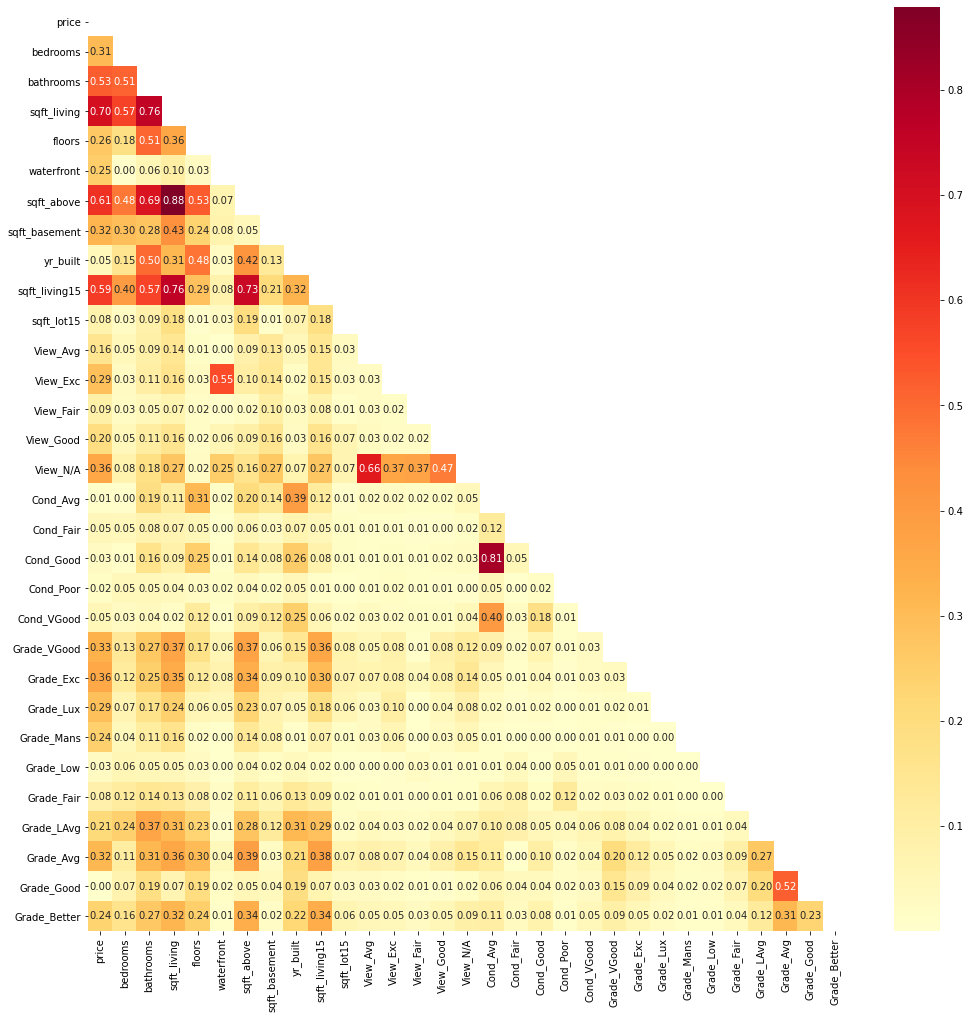

In [102]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_drop.corr(), dtype=bool))
sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_comparison.png', dpi=600);

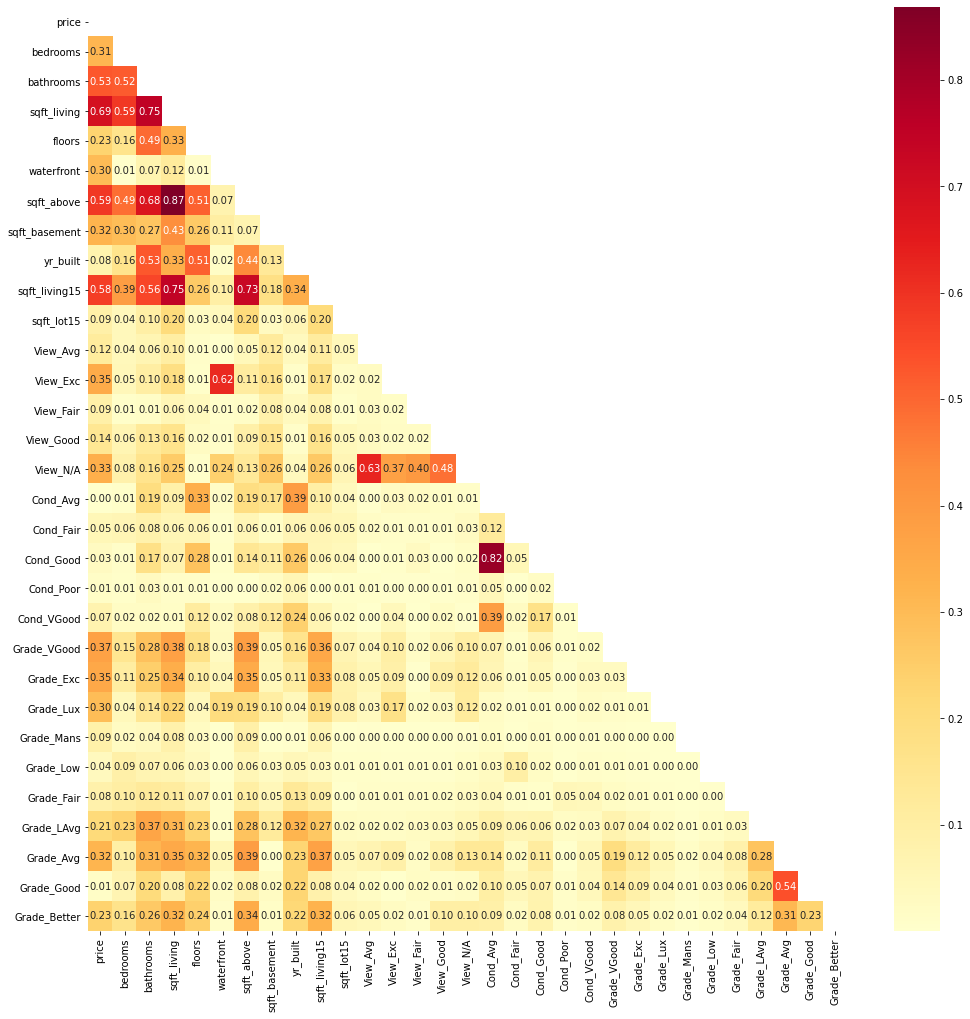

In [103]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_test_drop.corr(), dtype=bool))
sns.heatmap(rename_test_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_test_comparison.png', dpi=600);

## Linear Regression Time!!

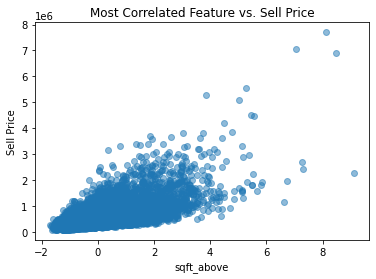

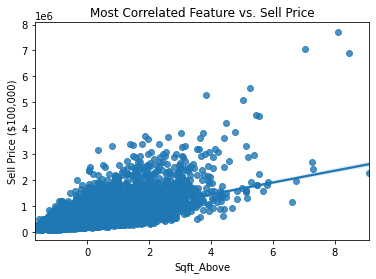

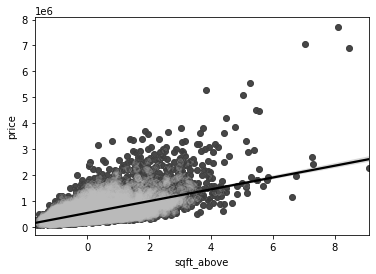

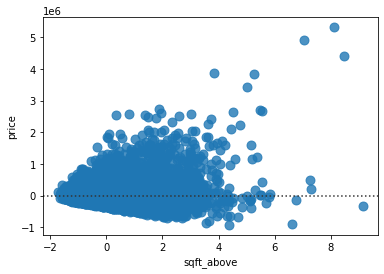

In [104]:
most_corr_feat = 'sqft_above'
fig, ax = plt.subplots()

ax.scatter(rename_drop[most_corr_feat], y_train, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat], y=y_train)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat],y=y_train, color="black")
ax3.scatter(rename_drop[most_corr_feat], y_train, alpha = 0.15,color="silver")
plt.savefig('sick_scatter_linear.png', dpi=600);

fig, ax4 = plt.subplots()
sns.residplot(x=rename_drop[most_corr_feat], y=y_train,
              scatter_kws={"s": 80});

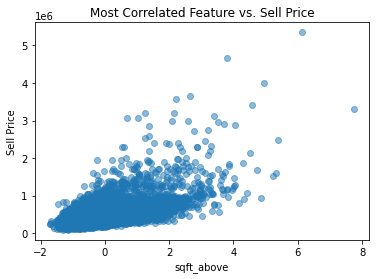

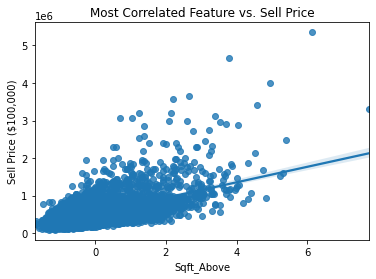

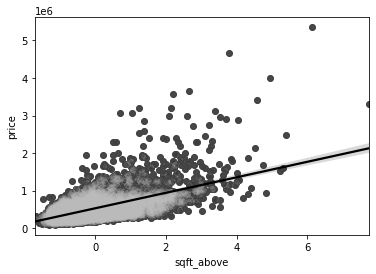

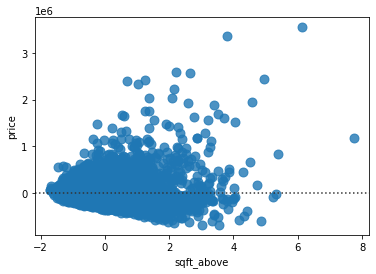

In [105]:
fig, ax = plt.subplots()

ax.scatter(rename_test_drop[most_corr_feat], y_test, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_test_drop[most_corr_feat], y=y_test)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_test_drop[most_corr_feat],y=y_test, color="black")
ax3.scatter(rename_test_drop[most_corr_feat], y_test, alpha = 0.15,color="silver")
plt.savefig('sick_scatter_linear_test.png', dpi=600);

fig, ax4 = plt.subplots()
sns.residplot(x=rename_test_drop[most_corr_feat], y=y_test,
              scatter_kws={"s": 80});

### "ShuffleSplit" cross validation scores using "Train" data

In [106]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_corr_feat]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.372788910332096
Validation score: 0.3695348366625604


### "ShuffleSplit" cross validation scores using "Test" data

In [107]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_test[[most_corr_feat]],
    y=y_test,
    return_train_score=True,
    cv=splitter
)

print("Test score:     ", baseline_scores["test_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Test score:      0.3627167905894609
Validation score: 0.3627167905894609


###  OLS Regression of all variables - messy, complex, and not useful:

In [108]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1114.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:            -2.2134e+05
No. Observations:               16197   AIC:                         4.427e+05
Df Residuals:                   16164   BIC:                         4.430e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.547e+07   5.35e+06     -4.765      0.000    -3.6e+07    -1.5e+07
id             -1.54e-06   5.75e-07     -2.676      0.007   -2.67e-06   -4.12e-07
bedrooms      -2.547e+04   2294.561    -11.102      0.000      -3e+04    -2.1e+04
bathrooms      4.424e+04   3878.391     11.407      0.000    3.66e+04    5.18e+04
sqft_living     107.5249     24.168      4.449      0.000      60.153     154.897
sqft_lot          0.0139      0.057      0.243      0.808      -0.099       0.126
floors         5.025e+04   4362.469     11.518      0.000    4.17e+04    5.88e+04
waterfront     5.267e+05   2.37e+04     22.233      0.000     4.8e+05    5.73e+05
sqft_above        8.8449     24.234      0.365      0.715     -38.657      56.347
sqft_basement    40.3979     24.202      1.669      0.095      -7.041      87.837
yr_built      -3338.1635     79.903    -41.778      0.000   -3494.783   -3181.545
zipcode         -14.1344     35.192     -0.402      0.688     -83.114      54.845
sqft_living15    36.5790      4.128      8.862      0.000      28.488      44.670
sqft_lot15       -0.5514      0.085     -6.480      0.000      -0.718      -0.385
date_num        232.3088     35.818      6.486      0.000     162.102     302.516
basement_?     3536.2690   1.32e+04      0.268      0.788   -2.23e+04    2.94e+04
AVERAGE       -5.148e+06   1.07e+06     -4.814      0.000   -7.24e+06   -3.05e+06
EXCELLENT     -4.973e+06   1.07e+06     -4.649      0.000   -7.07e+06   -2.88e+06
FAIR          -5.086e+06   1.07e+06     -4.756      0.000   -7.18e+06   -2.99e+06
GOOD          -5.073e+06   1.07e+06     -4.744      0.000   -7.17e+06   -2.98e+06
NONE          -5.195e+06   1.07e+06     -4.860      0.000   -7.29e+06    -3.1e+06
Average       -5.093e+06   1.07e+06     -4.762      0.000   -7.19e+06      -3e+06
Fair          -5.121e+06   1.07e+06     -4.788      0.000   -7.22e+06   -3.02e+06
Good          -5.078e+06   1.07e+06     -4.749      0.000   -7.17e+06   -2.98e+06
Poor          -5.144e+06   1.07e+06     -4.807      0.000   -7.24e+06   -3.05e+06
Very Good     -5.039e+06   1.07e+06     -4.714      0.000   -7.13e+06   -2.94e+06
10 Very Good  -2.637e+06   5.35e+05     -4.930      0.000   -3.69e+06   -1.59e+06
11 Excellent  -2.353e+06   5.35e+05     -4.398      0.000    -3.4e+06    -1.3e+06
12 Luxury      -1.87e+06   5.36e+05     -3.490      0.000   -2.92e+06    -8.2e+05
13 Mansion    -4.296e+05   5.38e+05     -0.798      0.425   -1.48e+06    6.26e+05
4 Low         -3.171e+06   5.36e+05     -5.916      0.000   -4.22e+06   -2.12e+06
5 Fair        -3.152e+06   5.35e+05     -5.896      0.000    -4.2e+06    -2.1e+06
6 Low Average -3.103e+06   5.35e+05     -5.802      0.000   -4.15e+06   -2.05e+06
7 Average     -3.022e+06   5.35e+05     -5.653      0.000   -4.07e+06   -1.97e+06
8 Good        -2.939e+06   5.35e+05     -5.497   

##  Narrowing it down to a one or two at a time:

In [109]:
formula = 'price ~ sqft_living'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.594e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:            -2.2522e+05
No. Observations:               16197   AIC:                         4.504e+05
Df Residuals:                   16195   BIC:                         4.505e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.44e+05   2079.671    261.579      0.000     5.4e+05    5.48e+05
sqft_living  2.626e+05   2079.671    126.261      0.000    2.59e+05    2.67e+05
==============================================================================
Omnibus:                    11437.576   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           466873.745
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      28.650   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
formula = 'price ~ sqft_living + Grade_Exc + Grade_Lux + View_Exc'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     5084.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:            -2.2418e+05
No. Observations:               16197   AIC:                         4.484e+05
Df Residuals:                   16192   BIC:                         4.484e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.44e+05   1950.709    278.872      0.000     5.4e+05    5.48e+05
sqft_living  2.229e+05   2172.827    102.572      0.000    2.19e+05    2.27e+05
Grade_Exc    5.139e+04   2093.589     24.548      0.000    4.73e+04    5.55e+04
Grade_Lux    4.783e+04   2026.032     23.609      0.000    4.39e+04    5.18e+04
View_Exc     6.324e+04   1981.756     31.911      0.000    5.94e+04    6.71e+04
==============================================================================
Omnibus:                    10883.290   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           562949.183
Skew:                           2.614   Prob(JB):                         0.00
Kurtosis:                      31.405   Cond. No.                         1.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
formula = 'price ~ sqft_living + Grade_Exc + Grade_Lux + View_Exc'
sqft_above_mod = ols(formula = formula, data = rename_test_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1732.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:                -74356.
No. Observations:                5399   AIC:                         1.487e+05
Df Residuals:                    5394   BIC:                         1.488e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.292e+05   3155.169    167.738      0.000    5.23e+05    5.35e+05
sqft_living  2.024e+05   3481.606     58.128      0.000    1.96e+05    2.09e+05
Grade_Exc    5.022e+04   3367.728     14.914      0.000    4.36e+04    5.68e+04
Grade_Lux    4.692e+04   3283.570     14.291      0.000    4.05e+04    5.34e+04
View_Exc     7.148e+04   3243.047     22.042      0.000    6.51e+04    7.78e+04
==============================================================================
Omnibus:                     2296.016   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23888.303
Skew:                           1.747   Prob(JB):                         0.00
Kurtosis:                      12.695   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  So I get best results, that I've been able to figure out, from price vs multivariate (sqft_living + Grade_Exc + Grade_Lux + View_Exc)  Best R2/AdjR2 I've found is 0.529 from the Training data, and 0.523 from the matching Test data. (all above)

In [112]:
formula = 'price ~ Grade_Exc + Grade_Lux'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2204.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:            -2.2882e+05
No. Observations:               16197   AIC:                         4.576e+05
Df Residuals:                   16194   BIC:                         4.577e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.44e+05   2597.404    209.439      0.000    5.39e+05    5.49e+05
Grade_Exc   1.346e+05   2597.510     51.827      0.000     1.3e+05     1.4e+05
Grade_Lux    1.09e+05   2597.510     41.966      0.000    1.04e+05    1.14e+05
==============================================================================
Omnibus:                    14126.414   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1144663.484
Skew:                           3.802   Prob(JB):                         0.00
Kurtosis:                      43.476   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
formula = 'price ~ sqft_living15 + sqft_living + bathrooms + sqft_above'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     4115.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:            -2.2509e+05
No. Observations:               16197   AIC:                         4.502e+05
Df Residuals:                   16192   BIC:                         4.502e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.44e+05   2063.202    263.667      0.000     5.4e+05    5.48e+05
sqft_living15  5.103e+04   3246.332     15.721      0.000    4.47e+04    5.74e+04
sqft_living    2.531e+05   5096.702     49.663      0.000    2.43e+05    2.63e+05
bathrooms     -5082.1177   3168.917     -1.604      0.109   -1.13e+04    1129.309
sqft_above    -2.895e+04   4440.104     -6.520      0.000   -3.77e+04   -2.02e+04
==============================================================================
Omnibus:                    12046.888   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           599443.927
Skew:                           3.084   Prob(JB):                         0.00
Kurtosis:                      32.158   Cond. No.                         5.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Below, we see that sqft_living correlates strongly with bathrooms and sqft_above, so these three should probably not be used together

In [114]:
formula = 'sqft_living ~ bathrooms + sqft_above'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                 3.590e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:                -9275.4
No. Observations:               16197   AIC:                         1.856e+04
Df Residuals:                   16194   BIC:                         1.858e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.334e-16      0.003   6.92e-14      1.000      -0.007       0.007
bathrooms      0.2882      0.005     61.926      0.000       0.279       0.297
sqft_above     0.6801      0.005    146.112      0.000       0.671       0.689
==============================================================================
Omnibus:                     4055.291   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10463.133
Skew:                           1.360   Prob(JB):                         0.00
Kurtosis:                       5.848   Cond. No.                         2.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
formula = 'sqft_living ~ View_Exc + Grade_Exc + Grade_Lux'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     1299.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:                -21236.
No. Observations:               16197   AIC:                         4.248e+04
Df Residuals:                   16193   BIC:                         4.251e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.193e-16      0.007   3.11e-14      1.000      -0.014       0.014
View_Exc       0.1108      0.007     15.570      0.000       0.097       0.125
Grade_Exc      0.3425      0.007     48.387      0.000       0.329       0.356
Grade_Lux      0.2339      0.007     32.980      0.000       0.220       0.248
==============================================================================
Omnibus:                     3583.424   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12108.827
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       6.613   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Just checking the VIF of this:

In [116]:
vif = [variance_inflation_factor(rename_drop.values,i) for i in range(rename_drop.shape[1])]
pd.Series(vif, index=rename_drop.columns, name = "Variance Inflation Factor")

F:\Flatiron\Anaconda2\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


price              1.281308
bedrooms           1.700982
bathrooms          3.349896
sqft_living      137.841328
floors             1.997414
waterfront         1.466922
sqft_above       112.098127
sqft_basement     30.491255
yr_built           1.901172
sqft_living15      2.906963
sqft_lot15         1.078995
View_Avg                inf
View_Exc                inf
View_Fair               inf
View_Good               inf
View_N/A                inf
Cond_Avg                inf
Cond_Fair               inf
Cond_Good               inf
Cond_Poor               inf
Cond_VGood              inf
Grade_VGood             inf
Grade_Exc               inf
Grade_Lux               inf
Grade_Mans              inf
Grade_Low               inf
Grade_Fair              inf
Grade_LAvg              inf
Grade_Avg               inf
Grade_Good              inf
Grade_Better            inf
Name: Variance Inflation Factor, dtype: float64

####  NOT GOOD!!  We don't want any values > 5, and 3 of these are, so we may have too much multicollinearity.